# Model 1

## Import and Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('GPA.csv')

## EDA + Preprocessing by filling Na's

In [3]:
df.shape

(76, 8)

In [4]:
df.head()

,Spec,Gender,St_Hr,School_AV,branch,level,Age,GPA
0,CS,F,6,80.0,P,3,20.0,78
1,CS,F,7,82.0,P,4,22.0,73
2,CS,F,4,81.0,P,3,20.0,80
3,CS,M,3,NaN,P,3,22.0,67
4,CS,M,3,NaN,P,3,22.0,67


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Spec       76 non-null     object 
 1   Gender     74 non-null     object 
 2   St_Hr      76 non-null     int64  
 3   School_AV  72 non-null     float64
 4   branch     76 non-null     object 
 5   level      76 non-null     int64  
 6   Age        68 non-null     float64
 7   GPA        76 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 4.9+ KB


In [6]:
df.describe()

,St_Hr,School_AV,level,Age,GPA
count,76.000000,72.000000,76.000000,68.000000,76.000000
mean,4.789474,70.166667,2.736842,21.220588,78.631579
std,1.236293,8.465339,0.929063,1.582041,6.657011
min,3.000000,54.000000,1.000000,18.000000,60.000000
25%,4.000000,65.000000,2.000000,20.000000,75.000000
50%,5.000000,70.000000,3.000000,22.000000,80.000000
75%,6.000000,77.000000,3.000000,22.000000,82.000000
max,7.000000,89.000000,6.000000,25.000000,90.000000


In [7]:
# Count Na values
df.isnull().sum()

Spec         0
Gender       2
St_Hr        0
School_AV    4
branch       0
level        0
Age          8
GPA          0
dtype: int64

In [8]:
# Fill the age with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['School_AV'].fillna(df['School_AV'].mean(), inplace=True)

/var/folders/w5/q_mfmfp557q99f_5j1v21c_40000gn/T/ipykernel_30002/2201442560.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/var/folders/w5/q_mfmfp557q99f_5j1v21c_40000gn/T/ipykernel_30002/2201442560.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [9]:
# Encode Gender before filling Na values
le = LabelEncoder()

le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])

# Fill the Na values with the mean
df['Gender'].fillna(df['Gender'].mean(), inplace=True)

/var/folders/w5/q_mfmfp557q99f_5j1v21c_40000gn/T/ipykernel_30002/666060405.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mean(), inplace=True)


In [10]:
df.isna().sum()

Spec         0
Gender       0
St_Hr        0
School_AV    0
branch       0
level        0
Age          0
GPA          0
dtype: int64

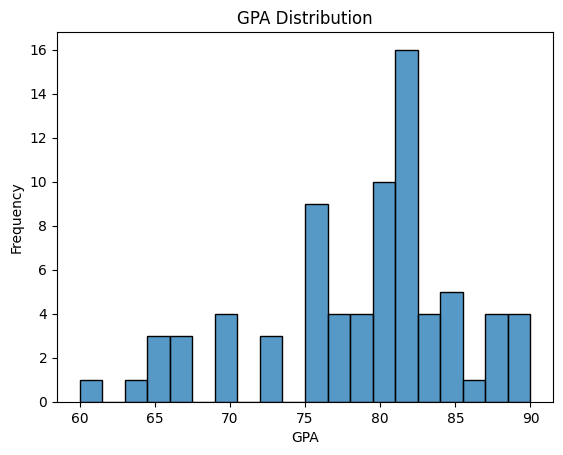

In [11]:
sns.histplot(df['GPA'], bins=20)
plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Spec       76 non-null     object 
 1   Gender     76 non-null     int64  
 2   St_Hr      76 non-null     int64  
 3   School_AV  76 non-null     float64
 4   branch     76 non-null     object 
 5   level      76 non-null     int64  
 6   Age        76 non-null     float64
 7   GPA        76 non-null     int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 4.9+ KB


In [13]:
# Convert categorical variables to numerical
le = LabelEncoder()
le.fit(df['Spec'])
df['Spec'] = le.transform(df['Spec'])
le.fit(df['branch'])
df['branch'] = le.transform(df['branch'])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Spec       76 non-null     int64  
 1   Gender     76 non-null     int64  
 2   St_Hr      76 non-null     int64  
 3   School_AV  76 non-null     float64
 4   branch     76 non-null     int64  
 5   level      76 non-null     int64  
 6   Age        76 non-null     float64
 7   GPA        76 non-null     int64  
dtypes: float64(2), int64(6)
memory usage: 4.9 KB


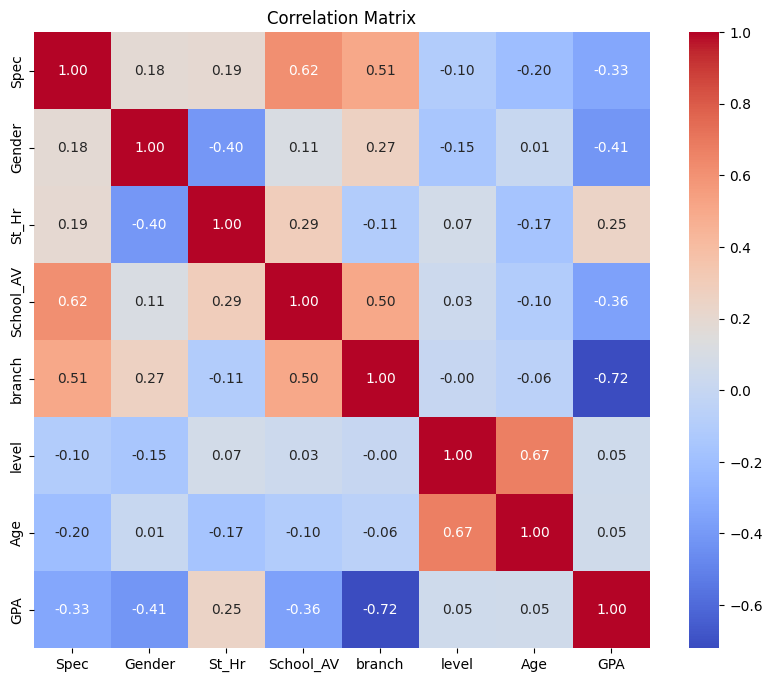

In [15]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

To explain the correlations, we can analyze the correlation matrix (`corr`) that shows the pairwise correlation coefficients between the variables in the dataset. Correlation values range from -1 to 1:

- **Positive Correlation**: A value close to 1 indicates a strong positive relationship (as one variable increases, the other also increases).
- **Negative Correlation**: A value close to -1 indicates a strong negative relationship (as one variable increases, the other decreases).
- **No Correlation**: A value close to 0 indicates no linear relationship.

Here are some observations from the `corr` matrix:

1. **`branch` and `GPA`**: Strong negative correlation (-0.72). This suggests that as the `branch` value increases, the `GPA` tends to decrease.
2. **`School_AV` and `Spec`**: Strong positive correlation (0.62). This indicates that higher `School_AV` values are associated with higher `Spec` values.
3. **`level` and `Age`**: Strong positive correlation (0.67). This suggests that as the `level` increases, the `Age` also tends to increase.
4. **`Gender` and `GPA`**: Moderate negative correlation (-0.41). This indicates that `Gender` has some influence on `GPA`, with males or females (depending on encoding) tending to have lower GPAs.
5. **`St_Hr` and `GPA`**: Moderate positive correlation (0.25). This suggests that more study hours (`St_Hr`) are associated with higher GPAs.


In [16]:
# Detect outliers using the IQR method
Q1 = df.quantile(0.25)  # First quartile
Q3 = df.quantile(0.75)  # Third quartile
IQR = Q3 - Q1           # Interquartile range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("Outliers detected in each column:")
print(outliers)

Outliers detected in each column:
Spec         0
Gender       0
St_Hr        0
School_AV    0
branch       0
level        1
Age          0
GPA          2
dtype: int64


In [17]:
# Check the outlier in level and GPA
outliers_level = df[(df < lower_bound['level']) | (df > upper_bound['level'])]
print("Outliers in level:")
print(outliers_level)
# Check the outlier in GPA
outliers_gpa = df[(df < lower_bound['GPA']) | (df > upper_bound['GPA'])]
print("Outliers in GPA:")  
print(outliers_gpa)

Outliers in level:
    Spec  Gender  St_Hr  School_AV  branch  level        Age  GPA
0    NaN     0.0    6.0  80.000000     NaN    NaN  20.000000   78
1    NaN     0.0    7.0  82.000000     NaN    NaN  22.000000   73
2    NaN     0.0    NaN  81.000000     NaN    NaN  20.000000   80
3    NaN     NaN    NaN  70.166667     NaN    NaN  22.000000   67
4    NaN     NaN    NaN  70.166667     NaN    NaN  22.000000   67
..   ...     ...    ...        ...     ...    ...        ...  ...
71   0.0     0.0    5.0  64.000000     0.0    NaN  23.000000   83
72   0.0     0.0    6.0  67.000000     0.0    NaN  22.000000   82
73   0.0     0.0    6.0  67.000000     0.0    NaN  22.000000   82
74   0.0     NaN    6.0  68.000000     0.0    NaN  21.220588   88
75   0.0     0.0    5.0  70.000000     NaN    NaN  25.000000   80

[76 rows x 8 columns]
Outliers in GPA:
    Spec  Gender  St_Hr  School_AV  branch  level        Age  GPA
0      2       0      6        NaN       1      3  20.000000  NaN
1      2       0 

In [18]:
# Remove outliers
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print("Data shape after removing outliers:", df.shape)

Data shape after removing outliers: (73, 8)


## Preprocessing + Training

In [19]:
df.isna().sum()

Spec         0
Gender       0
St_Hr        0
School_AV    0
branch       0
level        0
Age          0
GPA          0
dtype: int64

In [20]:
## Train-test split
X = df.drop('GPA', axis=1)
y = df['GPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (58, 7)
Test set shape: (15, 7)


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predictions:", y_pred)
print("Actual values:", y_test.values)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R^2 score:", r2_score(y_test, y_pred))

Predictions: [74.48856226 83.26440753 76.12481868 73.77581355 83.20853401 75.6825822
 73.0933665  82.46626614 84.46127247 74.03834677 82.42186594 83.59020718
 73.02943578 72.46660572 73.82396721]
Actual values: [67 82 70 78 82 80 65 82 85 75 90 82 76 76 77]
Coefficients: [ 0.79563908 -0.98339261 -0.00897102 -0.0469025  -8.91058965 -0.65216381
  0.60401015]
Intercept: 74.77743996495794
Mean squared error: 19.428218166857977
R^2 score: 0.539178885985342


## Model Evaluation + Export

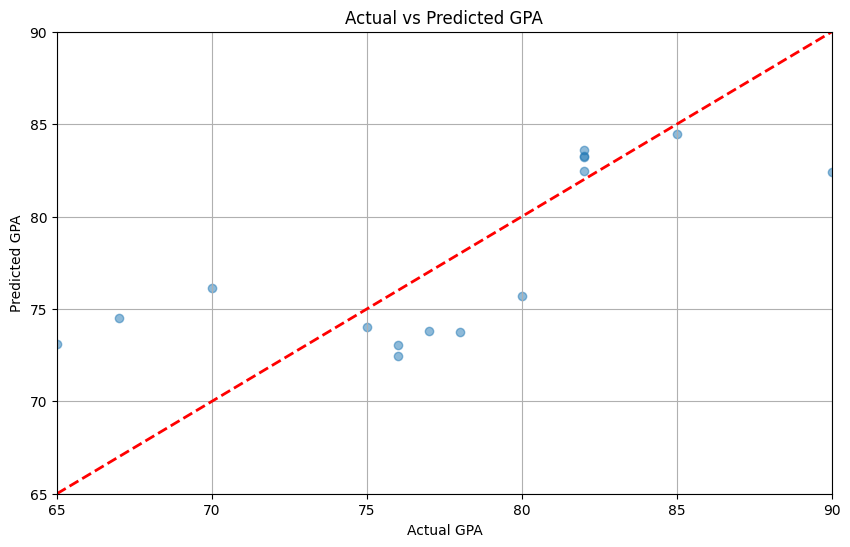

In [22]:
#Evaluate the model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted GPA')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

In [23]:
# Export the model
import joblib
joblib.dump(model, 'gpa_model_1.pkl')

['gpa_model_1.pkl']

# Model 2 start

In [25]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_ridge = grid_search.best_estimator_

y_pred = best_ridge.predict(X_test)
print("Predictions:", y_pred)
print("Actual values:", y_test.values)
print("Coefficients:", best_ridge.coef_)
print("Intercept:", best_ridge.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R^2 score:", r2_score(y_test, y_pred))

joblib.dump(best_ridge, 'gpa_model_2.pkl')
joblib.dump(poly, 'poly_transform.pkl')
joblib.dump(scaler, 'scaler.pkl')

Predictions: [75.15591448 82.33165436 74.85064508 75.67250296 82.4391004  77.11653705
 73.71165599 82.25037762 83.0478008  74.91550489 82.21461041 82.52722099
 75.03631457 74.56041624 75.98140764]
Actual values: [67 82 70 78 82 80 65 82 85 75 90 82 76 76 77]
Coefficients: [-0.03045831 -0.03668282  0.04357652 -0.10992714 -0.5006368  -0.03427864
  0.13145102  0.25368283 -0.31590378  0.05977549  0.04444588 -0.38119073
 -0.00660704 -0.02586503 -0.02955467  0.08656027 -0.0394098  -0.36411714
  0.02472266 -0.02813584  0.02134782 -0.00814737 -0.58820918 -0.01490907
  0.10175249 -0.06536787 -0.45696868 -0.05538366 -0.02626701 -0.5006368
 -0.3357797  -0.45636982 -0.04874214 -0.01676923  0.11574475]
Intercept: 79.2028994998036
Mean squared error: 16.5856558692598
R^2 score: 0.606602090387576


['scaler.pkl']

Model 2 achieves a better R² score (60.6%) compared to Model 1 because of the following improvements:

Polynomial Features:

Model 2 includes polynomial features (degree=2), which allow it to capture non-linear relationships between the input variables and the target (GPA). This is especially useful if the data has complex patterns that a simple linear model cannot capture.
Feature Scaling:

The features are scaled using StandardScaler, ensuring all variables have the same range. This is important for models like Ridge Regression, which are sensitive to feature magnitudes.
Regularization (Ridge Regression):

Ridge Regression adds a penalty to large coefficients, reducing overfitting and improving generalization. This helps the model perform better on unseen data.
Hyperparameter Tuning:

The alpha parameter in Ridge Regression was optimized using Grid Search, ensuring the model uses the best regularization strength for the dataset.
These enhancements allow Model 2 to better fit the data while avoiding overfitting, leading to a higher R² score.

# Model 3

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

y_pred = best_xgb.predict(X_test)
print("Predictions:", y_pred)
print("Actual values:", y_test.values)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R^2 score:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Predictions: [73.60924  82.62707  77.22496  78.71957  82.62707  79.68667  79.54071
 81.16081  82.62619  77.36569  82.62707  83.80257  73.246796 73.246796
 72.74908 ]
Actual values: [67 82 70 78 82 80 65 82 85 75 90 82 76 76 77]
Mean squared error: 27.432828903198242
R^2 score: 0.34931617975234985
